In [38]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

labels_list = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "TV", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

def draw_boxes(image, boxes, labels, scores, threshold=0.5):
    for box, label, score in zip(boxes, labels, scores):
        if score > threshold:
            x1, y1, x2, y2 = box
            # Draw rectangle
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Label
            cv2.putText(image, f'{labels_list[label - 1]}: {score * 100:.2f} %', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2, 2)
    return image

def load_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    return img_rgb, transform(img_rgb).unsqueeze(0)  # add batch dimension

def plot_image_with_boxes(image, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def load_models():
    faster_rcnn = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1)
    ssdlite = torchvision.models.detection.ssdlite320_mobilenet_v3_large(weights=torchvision.models.detection.SSDLite320_MobileNet_V3_Large_Weights.COCO_V1)
    faster_rcnn.eval()
    ssdlite.eval()
    return faster_rcnn, ssdlite

def predict_and_plot(models, image_path):
    faster_rcnn, ssdlite = models
    img_rgb, img_tensor = load_image(image_path)
    
    with torch.no_grad():
        faster_rcnn_preds = faster_rcnn(img_tensor)[0]
        ssdlite_preds = ssdlite(img_tensor)[0]

    faster_rcnn_boxes = faster_rcnn_preds['boxes'].cpu().numpy().astype(int)
    faster_rcnn_scores = faster_rcnn_preds['scores'].cpu().numpy()
    faster_rcnn_labels = faster_rcnn_preds['labels'].cpu().numpy()

    ssdlite_boxes = ssdlite_preds['boxes'].cpu().numpy().astype(int)
    ssdlite_scores = ssdlite_preds['scores'].cpu().numpy()
    ssdlite_labels = ssdlite_preds['labels'].cpu().numpy()

    faster_rcnn_img = img_rgb.copy()
    ssdlite_img = img_rgb.copy()

    faster_rcnn_img = draw_boxes(faster_rcnn_img, faster_rcnn_boxes, faster_rcnn_labels, faster_rcnn_scores)
    ssdlite_img = draw_boxes(ssdlite_img, ssdlite_boxes, ssdlite_labels, ssdlite_scores)

    plot_image_with_boxes(faster_rcnn_img, "Faster R-CNN (PARENT) Results")
    plot_image_with_boxes(ssdlite_img, "SSDLite (STUDENT) Results")

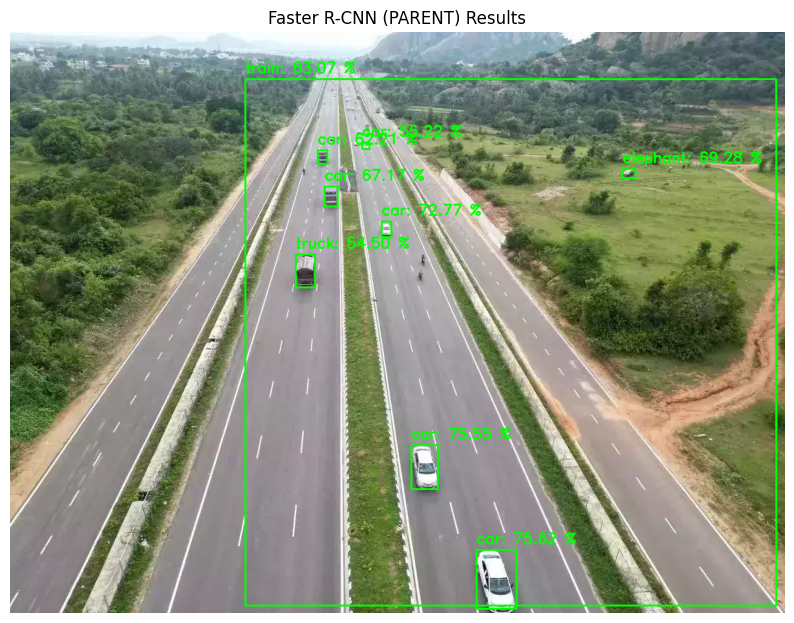

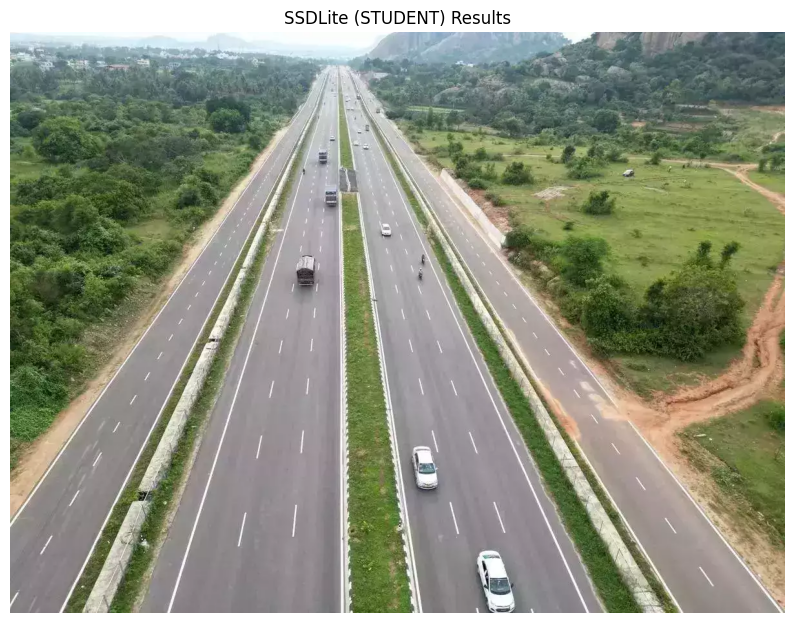

In [41]:
image_path = 'images/abc.jpg'
models = load_models()
predict_and_plot(models, image_path)